In [1]:
%pylab inline
import operator
import collections
import scipy.signal as sig
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
def iir_filter(b, a, x, y):
    y = list(reversed(y))
    x = list(reversed(x))
    tmp = sum(b[k]*x[k] for k in range(len(b))) + sum(-a[k+1]*y[k] for k in range(0,len(a)-1))
    return 1/a[0] * tmp

In [3]:
log_file = '/home/lasse/Dropbox/exo-arm/logs/emg_logs/mr_morten/mr_morten_flex_isokinetic_3rep/emg-1485951230.csv'

In [4]:
df = pd.read_csv(log_file)

In [5]:
emg4 = df['emg4']

In [6]:
fs = 200
nyq = 0.5 * fs

hp_cutoff = 10
normal_hp_cutoff = hp_cutoff / nyq
b_hp, a_hp  = sig.butter(4, normal_hp_cutoff, 'highpass')

lp_cutoff = 6
normal_lp_cutoff = lp_cutoff / nyq
b_lp, a_lp  = sig.butter(4, normal_lp_cutoff, 'lowpass')

In [7]:
x_hp = collections.deque([0] * 5, maxlen=5)
y_hp = collections.deque([0] * 4, maxlen=4)

x_rec = collections.deque([0] * 5, maxlen=5)
y_lp = collections.deque([0] * 4, maxlen=4)

tmp = []

for e in emg4:
    x_hp.append(e)
    y_hp_new = iir_filter(b_hp, a_hp, x_hp, y_hp)
    y_hp.append(y_hp_new)
        
    x_rec.append(abs(y_hp_new))

    y_lp_new = iir_filter(b_lp, a_lp, x_rec, y_lp)
    y_lp.append(y_lp_new)
    tmp.append(y_lp_new)

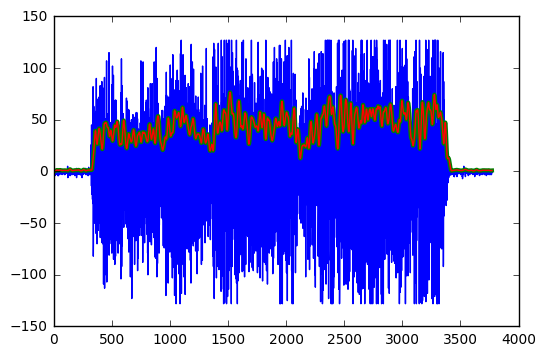

In [8]:
hp = sig.lfilter(b_hp, a_hp, emg4)
rec = abs(hp)
lp = sig.lfilter(b_lp, a_lp, rec)

plt.plot(emg4)
plt.plot(tmp, linewidth=3)
plt.plot(lp, linewidth=1)

In [9]:
x = list(emg4)
y1 = [0] * len(x)
y2 = [0] * len(x)

y = sig.lfilter(b_hp, a_hp, x)

for n in range(len(b_hp), len(x)):
    x1 = x[n-4:n+1]
    y_r = y2[n-4:n]
    
    #tmp = sum(b[k]*x1[k] for k in range(len(b))) + sum(-a[k+1]*y1[-k] for k in range(0,len(y1)))
    tmp1 = sum(b_hp[k]*x[n-k] for k in range(len(b_hp))) + sum(-a_hp[k]*y1[n-k] for k in range(1,len(a_hp)))
    ynew1 = tmp1 / a_hp[0]
    ynew2 = iir_filter(b_hp, a_hp, x1, y_r)    
    
    y1[n] = ynew1
    y2[n] = ynew2